# MMCN Projet - Sujet 2 : Les modèles de Hindmarsh-Rose

In [42]:
from math import *
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

toggle = False # if false, solve ODE; if true, find equilibria
labels = [0, 1]
    
def generer_portrait_phase(f, xrange, yrange, tmax):
    def rhs(t, x): return f(x[0], x[1])

    def plotdf(rhs, xrange, yrange, grid, ax):
        xn = np.linspace(xrange[0], xrange[1], 400)
        yn = np.linspace(yrange[0], yrange[1], 400)
        Xn, Yn = np.meshgrid(xn, yn)
        DXn, DYn = rhs(Xn, Yn)
        x = np.linspace(xrange[0], xrange[1], grid[0])
        y = np.linspace(yrange[0], yrange[1], grid[1])
        X, Y = np.meshgrid(x, y)
        DX, DY = rhs(X, Y)
        M = (np.hypot(DX, DY))
        M[M==0] = 1.0
        DX = DX/M
        DY = DY/M
        ax.quiver(X, Y, DX, DY, color='tab:green', angles='xy', alpha=0.5)
        ax.contour(Xn, Yn, DXn, levels=[0], colors='r', linestyles='dashed')
        ax.contour(Xn, Yn, DYn, levels=[0], colors='b', linestyles='dashed')
    
        

    def cross_top(t, x): return yrange[1]+0.5 - x[1]
    def cross_bot(t, x): return yrange[0]-0.5 - x[1]
    def cross_lef(t, x): return xrange[0]-0.5 - x[0]
    def cross_rig(t, x): return xrange[1]+0.5 - x[0]
    cross_top.terminal = True
    cross_bot.terminal = True
    cross_lef.terminal = True
    cross_rig.terminal = True
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plt.subplots_adjust(bottom=0.2)
    button = plt.axes([0.2, 0.05, 0.57, 0.05])   # [left, bottom, width, height]
    labels[0] = button.text(0.05, 0.25, "Cliquer pour trouver les points stationnaires", fontsize=10)
    labels[1] = button.text(0.05, 0.25, "Cliquer pour simuler le système", fontsize=10)
    labels[0].set_visible(True)
    labels[1].set_visible(False)
    button.set(xticks=[], yticks=[])
    button.set_facecolor('tab:green')

    ax.set_title("Portrait de phase")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.grid(True)
    plotdf(f, xrange, yrange, [11, 11], ax)
    plt.show()

    def solve_ode(t, x):
        solf = solve_ivp(rhs, (0,  tmax), x, t_eval=np.linspace(t,  tmax, 10000), 
                         events=[cross_top, cross_bot, cross_lef, cross_rig],atol=1.e-10, rtol=1.e-8)
        solb = solve_ivp(rhs, (0, -tmax), x, t_eval=np.linspace(t, -tmax, 10000), 
                         events=[cross_top, cross_bot, cross_lef, cross_rig],atol=1.e-10, rtol=1.e-8)
        ax.scatter(x[0], x[1], color='tab:olive', zorder=2)
        ax.plot(solf.y[0], solf.y[1], color='tab:blue', zorder=1)
        ax.plot(solb.y[0], solb.y[1], color='tab:blue', linestyle='dashed', zorder=1)

    def on_click(event):
        global toggle, labels
        if event.button is MouseButton.LEFT:
            if event.inaxes == button:
                labels[toggle].set_visible(False)
                toggle = not toggle
                labels[toggle].set_visible(True)
            if event.inaxes == ax:
                x = event.xdata
                y = event.ydata
                if x>xrange[0] and x<xrange[1] and y>yrange[0] and y<yrange[1]:
                    if toggle:
                        equilibrium = fsolve(lambda x: f(x[0], x[1]), [x, y])
                        xeq=equilibrium[0]
                        yeq=equilibrium[1]
                        ax.scatter(equilibrium[0], equilibrium[1], s=70, color='tab:red', zorder=2)
                        ax.set_title('Equilibre: x='+ str(xeq)+', y='+str(yeq))
                    else: solve_ode(0, [x, y])
            fig.canvas.draw()

    plt.connect('button_press_event', on_click)

### Premier régime : c=1

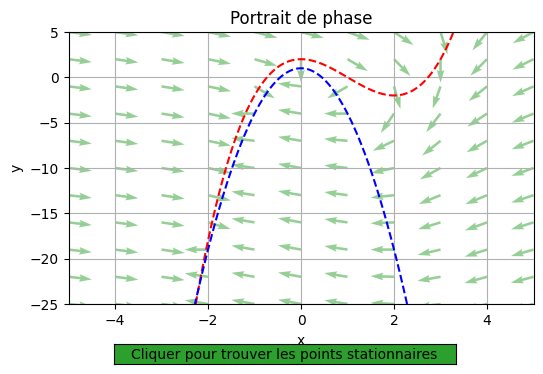

<Figure size 640x480 with 0 Axes>

In [44]:
# Valeurs du paramètre z
z=-2.0

# EDOs
def HR1(x,y):
    return [y-x**3+3*x**2+z,1-5*x**2-y]

generer_portrait_phase(HR1, xrange=[-5, 5], yrange=[-25, 5], tmax=50)

### Second regime : c=2

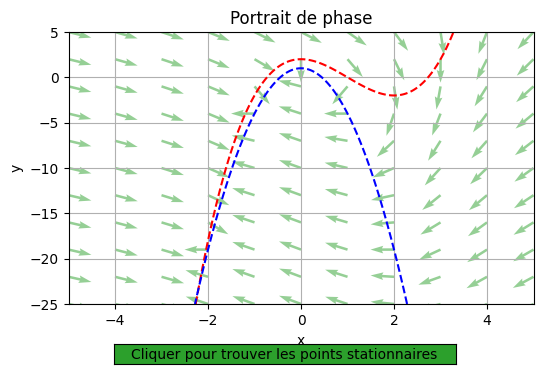

<Figure size 640x480 with 0 Axes>

In [ ]:
# Valeurs des paramètres
z=-2.0

# EDOs
def HR2(x,y):
    return [(y-x**3+3*x**2+z)/2,1-5*x**2-y]

generer_portrait_phase(HR2, xrange=[-5, 5], yrange=[-25, 5], tmax=50)

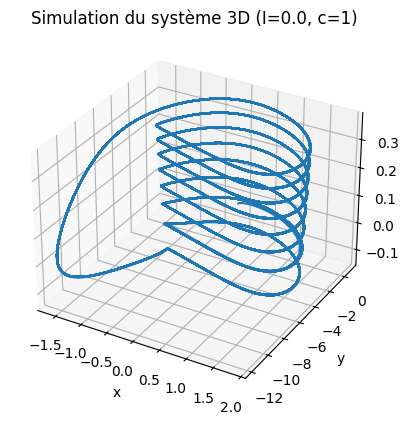

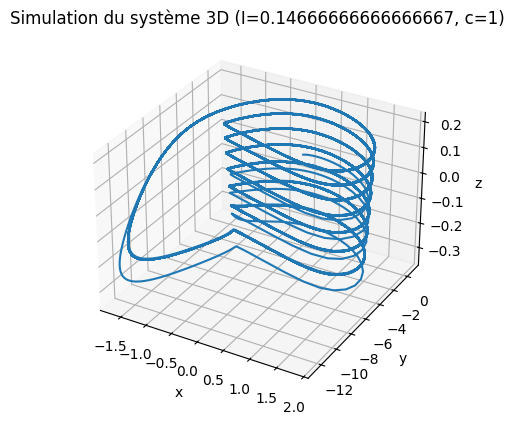

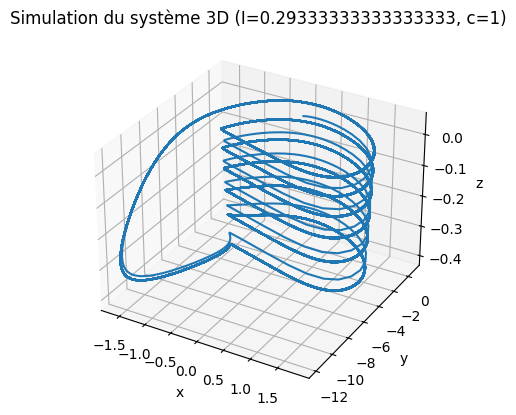

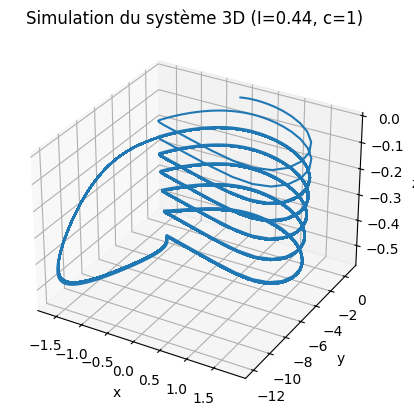

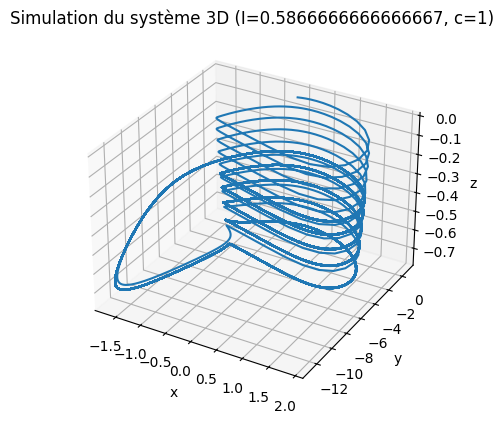

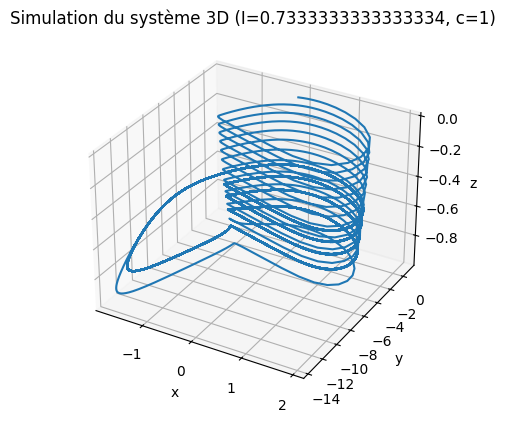

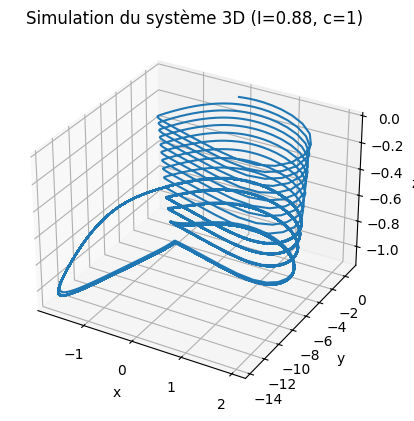

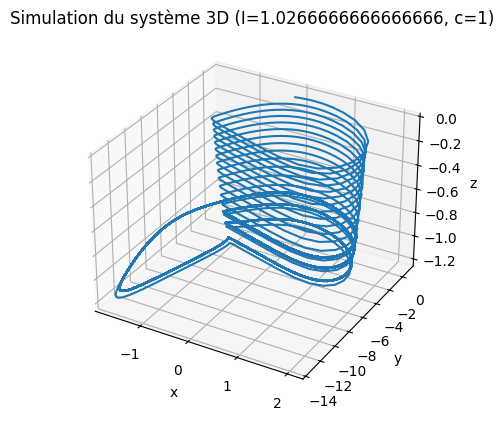

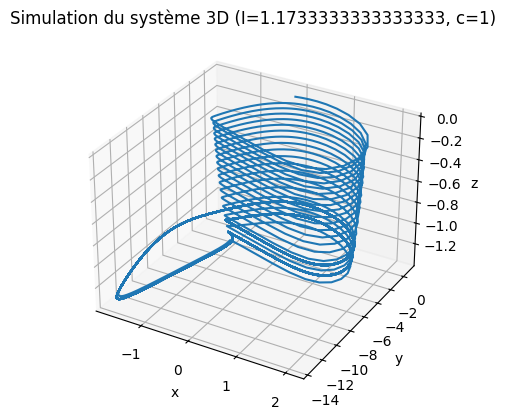

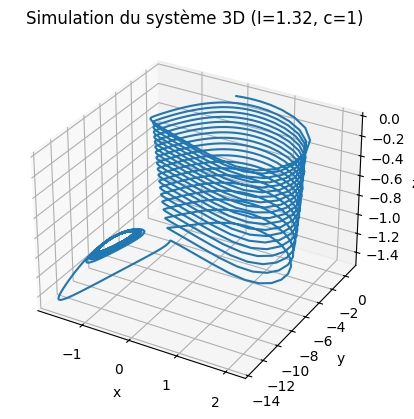

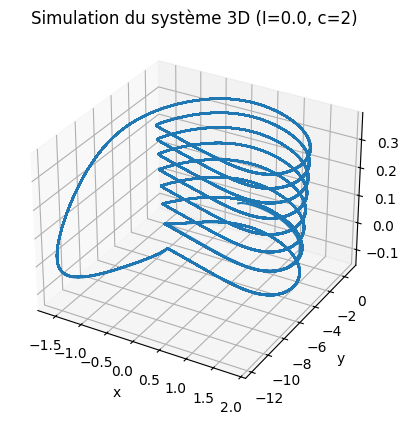

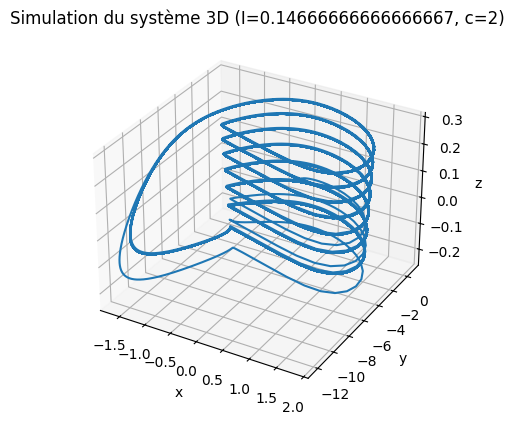

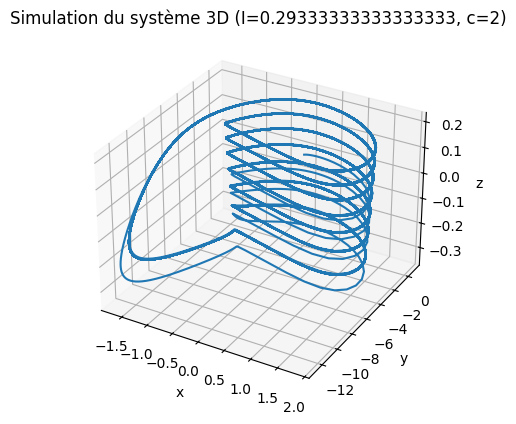

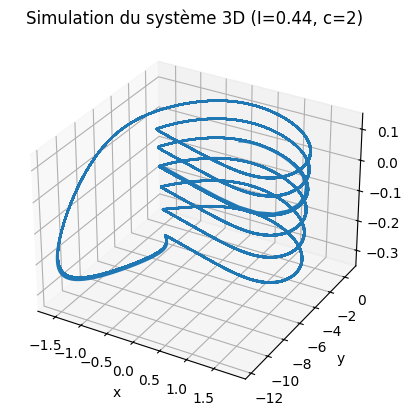

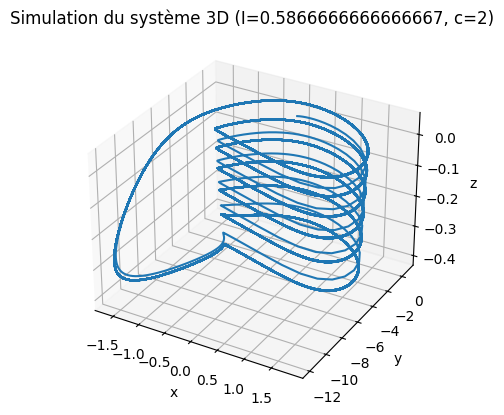

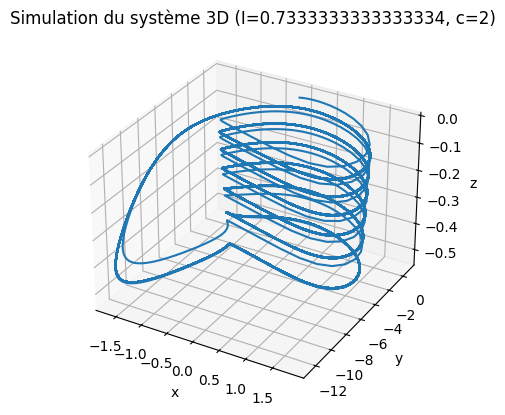

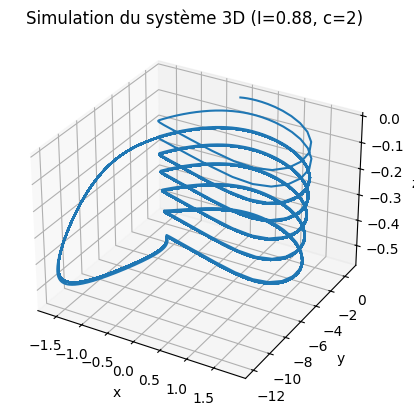

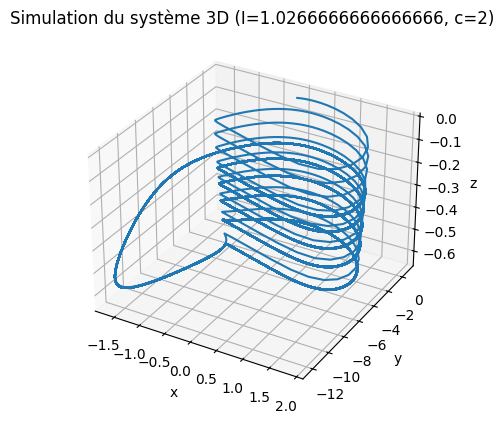

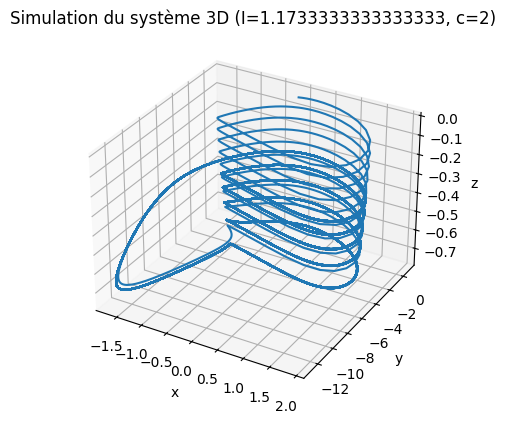

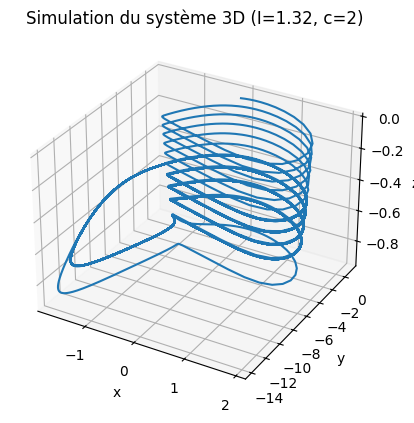

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définir les équations différentielles du système 3D
def hindmarsh_rose_3d(state, t, I, c):
    x, y, z = state
    dxdt = y - x**3 + 3*x**2 + z + I / c
    dydt = 1 - 5*x**2 - y
    dzdt = 0.01 * (0.3*z - 1 - x)
    return [dxdt, dydt, dzdt]

# Paramètres
I_values = np.linspace(0, 1.32, 10)
t = np.linspace(0, 10000, 100000)
initial_state = [0, 0, 0]

# Liste pour stocker les phases identifiées
phases = []

# Simuler le système pour différentes valeurs de I et c
for c in [1, 2]:
    for I in I_values:
        state = odeint(hindmarsh_rose_3d, initial_state, t, args=(I, c))
        x, y, z = state[:, 0], state[:, 1], state[:, 2]

        # Tracer les solutions dans l'espace des phases (x, y, z)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x, y, z)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title(f'Simulation du système 3D (I={I}, c={c})')
        plt.show()



# Comparaison des phases identifiées aux attracteurs du système d'origine
# Vous pouvez maintenant utiliser les indices de phases pour analyser les valeurs de z correspondant à chaque phase 
# et comparer ces valeurs aux attracteurs du système d'origine pour différentes valeurs de z.


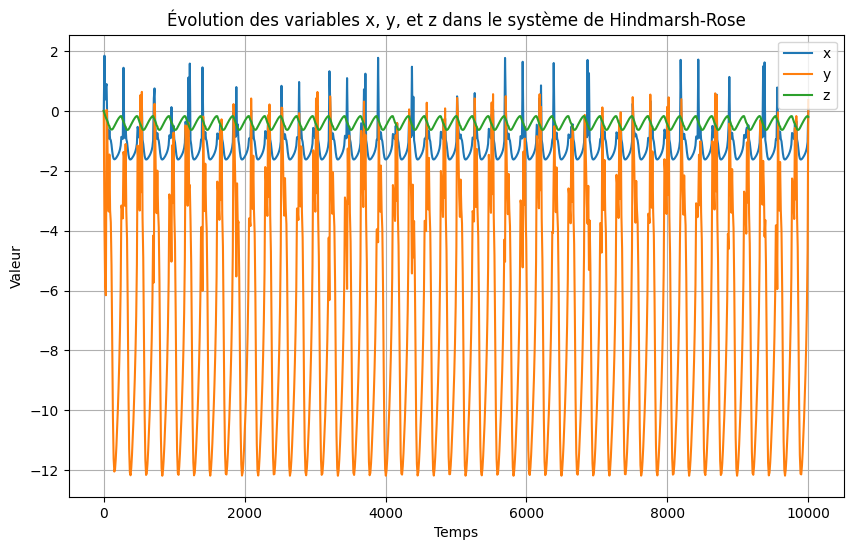

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définir les équations différentielles du système
def hindmarsh_rose(state, t, I, c):
    x, y, z = state
    dxdt = y - x**3 + 3*x**2 + z + I / c
    dydt = 1 - 5*x**2 - y
    dzdt = 0.01 * (0.3*z - 1 - x)
    return [dxdt, dydt, dzdt]

# Paramètres
I = 0.5  # valeur arbitraire pour I
c = 1    # valeur arbitraire pour c
initial_state = [0, 0, 0]  # conditions initiales
t = np.linspace(0, 10000, 1000)  # intervalle de temps pour la simulation

# Simulation du système
state = odeint(hindmarsh_rose, initial_state, t, args=(I, c))
x, y, z = state[:, 0], state[:, 1], state[:, 2]

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.title('Évolution des variables x, y, et z dans le système de Hindmarsh-Rose')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()
